In [1]:
import pandas as pd
import networkx as nx
from pyvis.network import Network
import numpy as np

In [2]:
df_gene_drug = pd.read_csv("Data/Munged_Data/gene_drug.csv")
df_disease_drug = pd.read_csv("Data/Munged_Data/disease_drugbank_assocations.tsv", sep='\t')
df_drug_disease = pd.read_csv("Data/Munged_Data/drug_disease_accs.tsv", sep='\t')
df_disease_go_bp_ida_assocations = pd.read_csv("Data/Munged_Data/disease_go_bp_ida_assocations.tsv", sep='\t')

drug_list = list(set(df_disease_drug["DrugBankID"]))

In [3]:
G = nx.from_pandas_edgelist(df_disease_drug, 'diseaseId', 'DrugBankID')

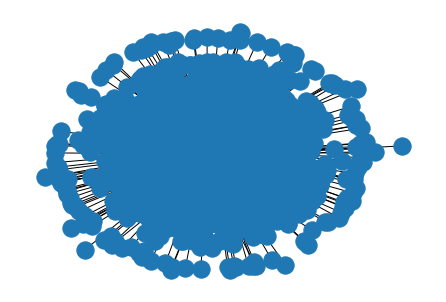

In [4]:
nx.draw(G)

In [5]:
print(nx.info(G))
print("Network density:", nx.density(G))

Graph with 7288 nodes and 630953 edges
Network density: 0.023761282177469856


In [6]:
#pyvis visualization for a random subset
G_sample = nx.from_pandas_edgelist(df_disease_drug.sample(n=1000), 'diseaseId', 'DrugBankID')
net = Network(notebook=True, directed=False)
net.from_nx(G_sample)
net.show_buttons(filter_=True)
net.show( "disease_drug_sample.html")

In [7]:
F = nx.from_pandas_edgelist(df_disease_go_bp_ida_assocations, 'diseaseId', 'GO', "Edge_Strenght")

In [8]:
print(nx.info(F))
print("Network density:", nx.density(F))

Graph with 12988 nodes and 322097 edges
Network density: 0.003819139790805944


In [10]:
#pyvis visualization for a random subset
F_sample = nx.from_pandas_edgelist(df_disease_go_bp_ida_assocations.sample(n=1000), 'diseaseId', 'GO', "Edge_Strenght")
net = Network(notebook=True, directed=False)
net.from_nx(F_sample)
net.show_buttons(filter_=True)
net.show( "disease_disease_sample.html")

In [11]:
H = nx.compose(G,F)
print(nx.info(H))
print("Network density:", nx.density(H))

Graph with 15100 nodes and 953050 edges
Network density: 0.00836027472544342


In [12]:
#pyvis visualization for a random subset
H_sample = nx.compose(G_sample, F_sample)
net = Network(notebook=True, directed=False)
net.from_nx(H_sample)
net.show_buttons(filter_=True)
net.show( "network_sample.html")

In [13]:
#example - finding a path between disease and drug
print(nx.single_source_shortest_path(H, "C0494261")["DB00907"])

['C0494261', 'GO:0006974', 'C0007102', 'DB00907']


In [23]:
def shortest_path_all_targets(disease_name, graph, drug_list):
    paths = []
    path_lengths = []
    for drug in drug_list:
        try:
            temp_path = nx.single_source_shortest_path(graph, disease_name)[drug]
            if len(temp_path)>1:
                paths.append(temp_path)
                path_lengths.append(len(temp_path))
        except:
            pass
    return paths, path_lengths

In [24]:
#finding a shortest target drug
paths, path_lengths = shortest_path_all_targets("C1956147", H, drug_list)
shortest_target = paths[np.argmin(path_lengths)]
print(shortest_target)

['C1956147', 'DB00641']


---